# Feature Manipulation in Pandas

Here let's look at a different dataset that will allow us to really dive into some meaningful visualizations. This data set is publically available, but it is also part of a Kaggle competition.

You can get the data from here: https://www.kaggle.com/c/titanic-gettingStarted or you can use the code below to load the data from GitHub.

There are lots of iPython notebooks for looking at the Titanic data. Check them out and see if you like any better than this one!

When going through visualization options, I recommend the following steps:
- Would you like the visual to be interactive?
  - Yes, Does it have a lot of data?
    - No, Use plotly or bokeh
    - Yes, sub-sample and then use plotly/bokeh
  - No, Does seaborn have a built-in function for plotting?
    - Yes, use seaborn
    - No, Does Pandas support the visual?
      - Yes, use pandas
      - No, use low level matplotlib
      
Look at various high level plotting libraries like:
- Altair (https://altair-viz.github.io)
- Bokeh (http://bokeh.pydata.org/en/latest/)
- And many others...

## Adding Dependencies
- `conda install -c conda-forge missingno`
- `conda install nodejs`
- `jupyter labextension install @jupyterlab/plotly-extension`

# Loading the Titanic Data for Example Visualizations

In [1]:
# load the Titanic dataset
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('https://raw.githubusercontent.com/eclarson/DataMiningNotebooks/master/data/titanic.csv') # read in the csv file

df.head()

Pandas: 0.23.0
Numpy: 1.14.3


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
# note that the describe function defaults to using only some variables
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [3]:
print(df.dtypes)
print('===========')
print(df.info())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [4]:
# the percentage of individuals that survived on the titanic
sum(df.Survived==1)/len(df)*100.0

38.38383838383838

## Grouping the Data

In [5]:
# Lets aggregate by class and count survival rates
df_grouped = df.groupby(by='Pclass')
for val,grp in df_grouped:
    print('There were',len(grp),'people traveling in',val,'class.')

There were 216 people traveling in 1 class.
There were 184 people traveling in 2 class.
There were 491 people traveling in 3 class.


In [6]:
# an example of using the groupby function with a data column
print(df_grouped.Survived.sum())
print('---------------------------------------')
print(df_grouped.Survived.count())
print('---------------------------------------')
print(df_grouped.Survived.sum() / df_grouped.Survived.count())

# might there be a better way of displaying this data?

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
---------------------------------------
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
---------------------------------------
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [7]:
# Class Exercise: Create code for calculating the std 
df_grouped.std() / df_grouped.count()**(0.5)

Age  Cabin  Embarked      Fare  Name     Parch  PassengerId  Sex  \
Pclass                                                                          
1       1.085398    NaN       NaN  5.333109   NaN  0.047221    16.788368  NaN   
2       1.064482    NaN       NaN  0.989144   NaN  0.050938    18.493067  NaN   
3       0.663187    NaN       NaN  0.531540   NaN  0.040114    11.934076  NaN   

           SibSp  Survived  Ticket  
Pclass                              
1       0.041634  0.032934     NaN  
2       0.044353  0.036906     NaN  
3       0.062048  0.019358     NaN

___________
## Cleaning the Dataset
Let's start by visualizing some of the missing data in this dataset. We will use the `missingno` package to help visualize where the data contains `NaNs`. This is a great tool for looking at nan values and how we might go about filling in the values. 

For this visualization, we can use a visualization library called `missingno` that hs many types of visuals for looking at missing data in a dataframe. I particularly like the `matrix` visualization, but there are many more to explore:
- https://github.com/ResidentMario/missingno

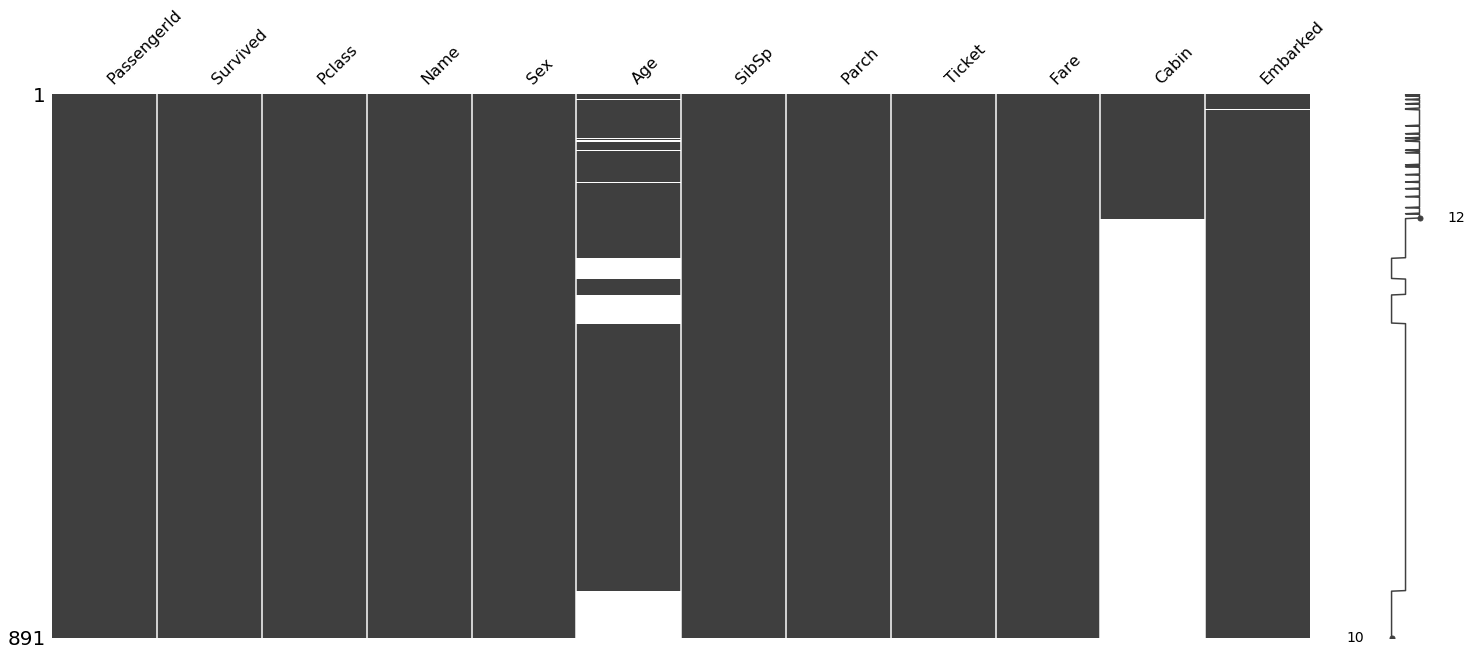

In [8]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df.sort_values(by=["Cabin","Embarked","Age",]))

In [9]:
# let's clean the dataset a little before moving on

# 1. Remove attributes that just arent useful for us
for col in ['PassengerId','Name','Cabin','Ticket']:
    if col in df:
        del df[col]

# 2. Impute some missing values, grouped by their Pclass and SibSp numbers
df_grouped = df.groupby(by=['Pclass','SibSp', 'Sex'])
print (df_grouped.describe())

                       Age                                                     \
                     count       mean        std    min      25%   50%    75%   
Pclass SibSp Sex                                                                
1      0     female   46.0  34.000000  13.016229  15.00  24.0000  31.5  42.75   
             male     67.0  42.738806  15.062335   4.00  31.5000  40.0  54.50   
       1     female   34.0  36.441176  14.315051   2.00  26.5000  37.0  47.75   
             male     31.0  38.481290  15.255322   0.92  28.5000  38.0  49.00   
       2     female    3.0  30.666667  19.399313  18.00  19.5000  21.0  37.00   
             male      2.0  47.000000   4.242641  44.00  45.5000  47.0  48.50   
       3     female    2.0  23.500000   0.707107  23.00  23.2500  23.5  23.75   
             male      1.0  19.000000        NaN  19.00  19.0000  19.0  19.00   
2      0     female   42.0  30.440476  12.468596   6.00  23.2500  30.0  37.50   
             male     67.0  

In [10]:
# now use this grouping to fill the data set in each group, then transform back

# create new dataframe that fills groups with the median of that group
func = lambda grp: grp.fillna(grp.median())
df_imputed = df_grouped.transform(func)

# fill any deleted columns
col_deleted = list( set(df.columns) - set(df_imputed.columns)) # in case the median operation deleted columns
df_imputed[col_deleted] = df[col_deleted]

print (df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Age         884 non-null float64
Parch       891 non-null int64
Fare        891 non-null float64
Pclass      891 non-null int64
Embarked    889 non-null object
Sex         891 non-null object
SibSp       891 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [11]:
# 4. drop rows that still had missing values after grouped imputation
df_imputed.dropna(inplace=True)

# 5. Rearrange the columns
df_imputed = df_imputed[['Survived','Age','Sex','Parch','SibSp','Pclass','Fare','Embarked']]

print (df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 8 columns):
Survived    882 non-null int64
Age         882 non-null float64
Sex         882 non-null object
Parch       882 non-null int64
SibSp       882 non-null int64
Pclass      882 non-null int64
Fare        882 non-null float64
Embarked    882 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.0+ KB
None


________________
**[back to slides]**

## Feature Discretization
This is an example of how to make a continuous feature and ordinal feature. Let's try to give some human intuition to a variable by grouping the data by age. 

In [12]:
# let's break up the age variable
df_imputed['age_range'] = pd.cut(df_imputed['Age'],[0,16,30,65,1e6],
                                 labels=['child','young adult','adult','senior']) # this creates a new variable
df_imputed.age_range.describe()

count             882
unique              4
top       young adult
freq              444
Name: age_range, dtype: object

In [13]:
# now lets group with the new variable
df_grouped = df_imputed.groupby(by=['Pclass','age_range'])
print ("Percentage of survivors in each group:")
print (df_grouped.Survived.sum() / df_grouped.Survived.count() *100)

Percentage of survivors in each group:
Pclass  age_range  
1       child          88.888889
        young adult    73.076923
        adult          58.389262
        senior         25.000000
2       child          90.476190
        young adult    41.860465
        adult          42.666667
        senior          0.000000
3       child          38.666667
        young adult    24.183007
        adult          15.841584
        senior          0.000000
Name: Survived, dtype: float64


__________
___________
# Visualization in Python with Pandas, Matplotlib, and Others

In [14]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

print('Matplotlib:', matplotlib. __version__)
# could also say "%matplotlib notebook" here to make things interactive

Matplotlib: 2.2.2


___________
## Visualizing the dataset

Pandas has plenty of plotting abilities built in. Let's take a look at a few of the different graphing capabilities of Pandas with only matplotlib. Afterward, we can make the visualizations more beautiful.

### Visualization Techniques: Distributions
- Histogram 
 - Usually shows the distribution of values of a single variable
 - Divide the values into bins and show a bar plot of the number of objects in each bin. 
- KDE
 - Add up Gaussian underneath each point value
 - STD of gaussian is equivalent to number of bins in histogram

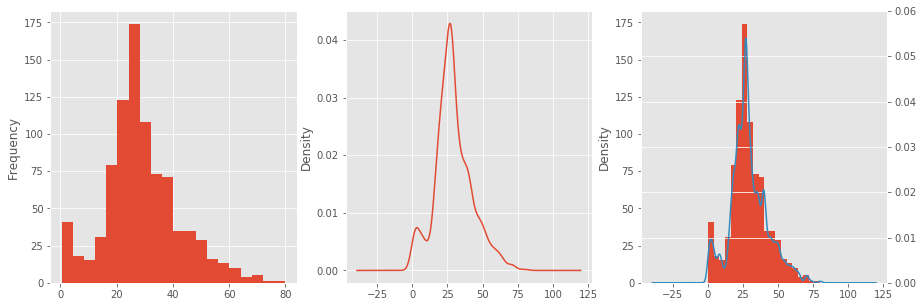

In [15]:
# Start by just plotting what we previously grouped!
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df_imputed.Age.plot.hist(bins=20)

plt.subplot(1,3,2)
df_imputed.Age.plot.kde(bw_method=0.2)

plt.subplot(1,3,3)
df_imputed.Age.plot.hist(bins=20)
df_imputed.Age.plot.kde(bw_method=0.1, secondary_y=True)
plt.ylim([0, 0.06])

plt.show()

### Two-Dimensional Distributions
- Estimate the joint distribution of the values of two attributes 
 - Example: petal width and petal length
  - What does this tell us? 

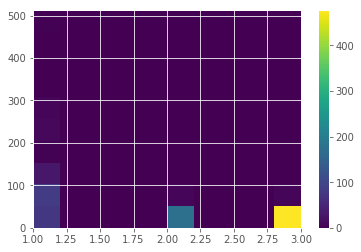

In [16]:
plt.hist2d(x=df_imputed.Pclass, y=df_imputed.Fare.values)
plt.colorbar()
plt.show()

The above plot is not all that meaningful. We can probably do better than visualizing the joint distribution using 2D histograms. Let's face it: 2D histrogram are bound to be sparse and not very descriptive. Instead, let's do something smarter.

- Feature Correlation Plot
 - First lets visualize the correlation between the differnet features.

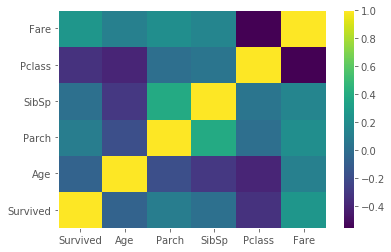

In [17]:
# plot the correlation matrix 
vars_to_use = ['Survived', 'Age', 'Parch', 'SibSp', 'Pclass', 'Fare'] # pick vars
plt.pcolor(df_imputed[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

### Grouped Count Plots
Grouping mean to display the counts of different subgroups on the dataset. For the titanic data, this can be quite telling of the dataset.

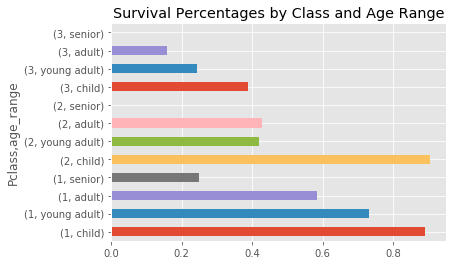

In [18]:
# first group the data
df_grouped = df_imputed.groupby(by=['Pclass','age_range'])

# tabulate survival rates of each group
survival_rate = df_grouped.Survived.sum() / df_grouped.Survived.count()

# show in a bar chart using builtin pandas API
ax = survival_rate.plot(kind='barh')
plt.title('Survival Percentages by Class and Age Range')
plt.show()

Survived            False  True 
Pclass age_range                
1      young adult      1      8
       adult           14     38
       child           62     87
       senior           3      1
2      young adult      2     19
       adult           50     36
       child           43     32
       senior           2      0
3      young adult     46     29
       adult          232     74
       child           85     16
       senior           2      0


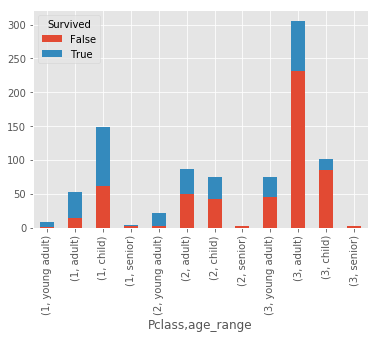

In [19]:
# the cross tab operator provides an easy way to get these numbers
survival = pd.crosstab([df_imputed['Pclass'],
                        df_imputed['age_range']], # categories to cross tabulate
                       df_imputed.Survived.astype(bool)) # how to group
print(survival)

survival.plot(kind='bar', stacked=True)
plt.show()

### Scatter Plots
- Two-dimensional scatter plots most common
- Additional attributes can be displayed by using the size, shape, and color of the markers that represent the objects
- Interactivity can add insight 
- It is useful to have matrices of scatter plots to compactly summarize the relationships of several pairs of attributes
- Good for numeric data, but needs jitter for categorical data

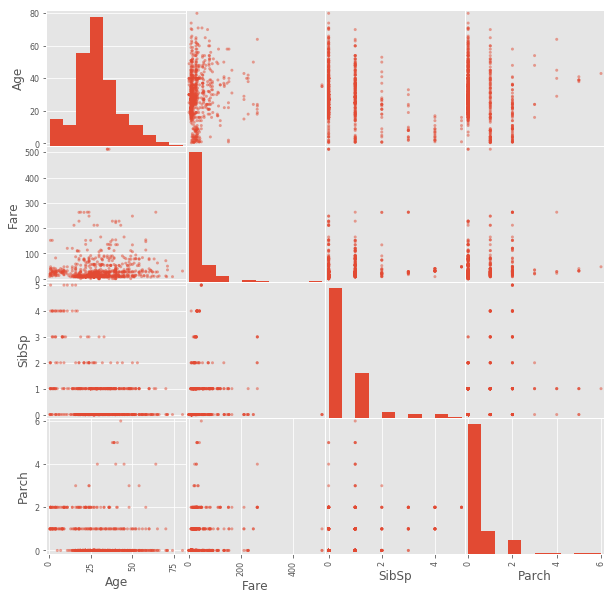

In [20]:
from pandas.plotting import scatter_matrix

vars_to_use = [ 'Age', 'Fare', 'SibSp','Parch'] # pick vars
# NOT A GOOD PLOT, it needs jitter to make the categorical attributes better visualized
ax = scatter_matrix(df_imputed[vars_to_use],figsize=(10, 10))

# also we need some type of subset selection, this is just too much data

### Sub-group Distribution Plots
- Box Plots 
 - Invented by J. Tukey
 - Another way of displaying the distribution of data 
 - Following figure shows the basic part of a box plot:
 
<img src="data/TukeyPlot.png" alt="TukeyBoxplot" width="600" height="600">

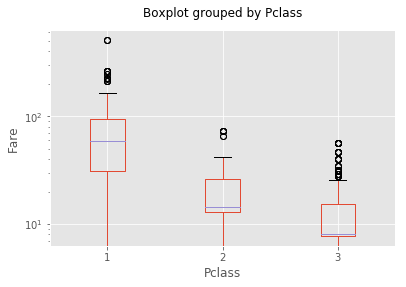

In [21]:
ax = df_imputed.boxplot(column='Fare', by = 'Pclass') # group by class
plt.ylabel('Fare')
plt.title('')
ax.set_yscale('log')

The problem with boxplots is that they might hide important aspects of the ditribution. For example, this plot shows data that all have the exact same boxplot.

<img src="https://g.redditmedia.com/Opizo6PEpuT_cL0N0tWK5g59CsMHFystdNCpYOqhu-A.gif?fm=mp4&mp4-fragmented=false&s=8aa6376ae576e8a42db8fb0226047c81" alt="TukeyBoxplot" width="600" >

# Simplifying Plotting with Seaborn


Using pandas and matplotlib is great until you need to redo or make more intricate plots. Let's see about one or two APIs that might simplify our lives. First, let's use Seaborn.
+ `import seaborn as sns` 

In seaborn, we have access to a number of different plotting tools. Let's take a look at:
- Box Plots
- Swarm Plots
- Violin Plots

In [22]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

print('Seaborn:', sns. __version__)
# now try plotting some of the previous plots, way more visually appealing!!

Seaborn: 0.8.1


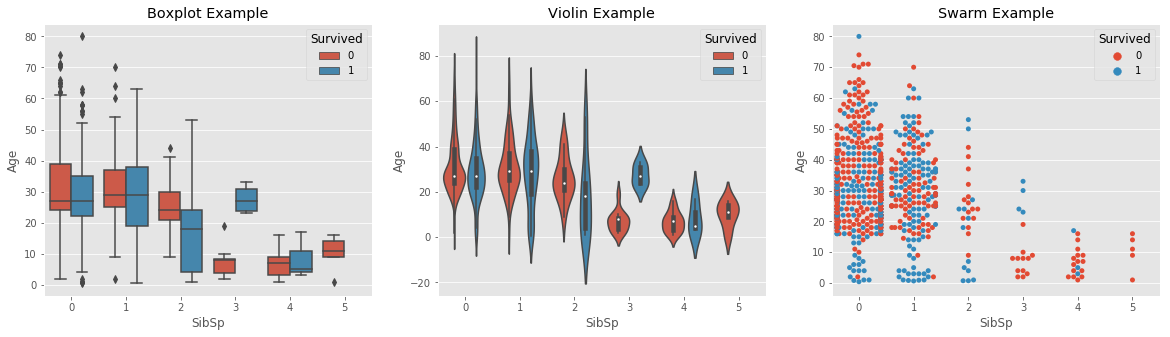

In [23]:
# sns boxplot
plt.subplots(figsize=(20, 5))

plt.subplot(1,3,1)
sns.boxplot(x="SibSp", y="Age", hue="Survived", data=df_imputed)
plt.title('Boxplot Example')

plt.subplot(1,3,2)
sns.violinplot(x="SibSp", y="Age", hue="Survived", data=df_imputed)
plt.title('Violin Example')

plt.subplot(1,3,3)
sns.swarmplot(x="SibSp", y="Age", hue="Survived", data=df_imputed)
plt.title('Swarm Example')

plt.show()

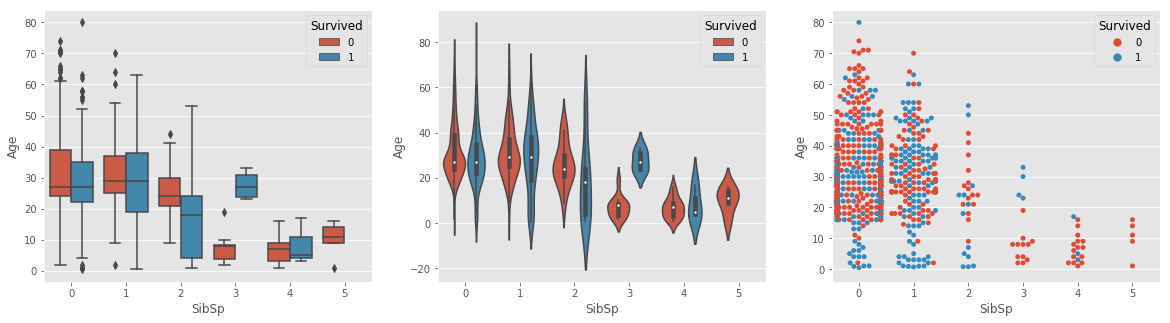

In [24]:
# ASIDE: UGH so much repeated code, can we do better?
plt.subplots(figsize=(20, 5))
args = {'x':"SibSp", 'y':"Age", 'hue':"Survived", 'data':df_imputed}
funcs_to_plot = [sns.boxplot,sns.violinplot,sns.swarmplot]
for i, plot_func in enumerate(funcs_to_plot):
    plt.subplot(1,3,i+1)
    plot_func(**args)
    
plt.show()

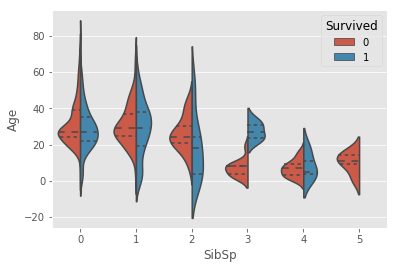

In [25]:
sns.violinplot(x="SibSp", y="Age", hue="Survived", data=df_imputed, 
               split=True, inner="quart")

plt.show()

________


### Self Test 2a.2
<img src="data/self_test_2a_2.png" alt="TukeyBoxplot" width="600" height="600">



____
### Matrix Plots
- Plot some data matrix
- This can be useful when objects are sorted well
- Typically, the attributes are normalized to prevent one attribute from dominating the plot
- Plots of similarity or distance matrices can also be useful for visualizing the relationships between objects
- Two versions:
 - Feature Based
 - Instance Based

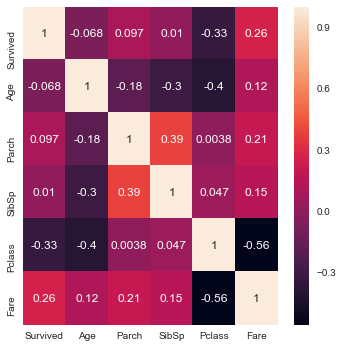

In [26]:
# the correlation plot is Feature based becasue we get
# a place in the plot for each feature
# in this plot we are asking, what features are most correlated? 
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_imputed.corr(), cmap=cmap, annot=True)

f.tight_layout()

What is wrong with this plot?


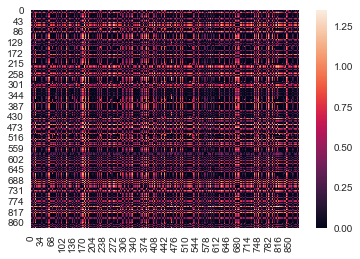

In [27]:
# but we could also be asking, what instances are most similar to each other?

# NOTE" COrrelation here is defined as a distance metric by scipy 
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.correlation.html 
# it is defined as 1-CC, so '0' means highly correlated

from sklearn.metrics.pairwise import pairwise_distances

vars_to_use = [ 'Age', 'Pclass', 'Fare', 'SibSp','Parch'] # pick vars

xdata = pairwise_distances(df_imputed[vars_to_use].values, metric='correlation')
sns.heatmap(xdata, cmap=cmap, annot=False)
print('What is wrong with this plot?')

Is there still something worng?


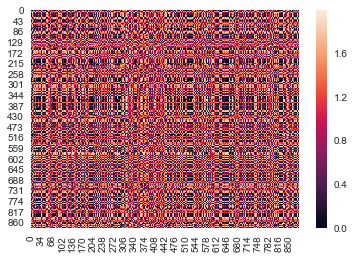

In [28]:
# lets fix a few things
# first, the difference between each instance was largel impacted by the biggest variable, Fare

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

xdata = pairwise_distances(std.fit_transform(df_imputed[vars_to_use].values), metric='correlation')
sns.heatmap(xdata, cmap=cmap, annot=False)
print('Is there still something worng?')

Is there anything we can conclude?


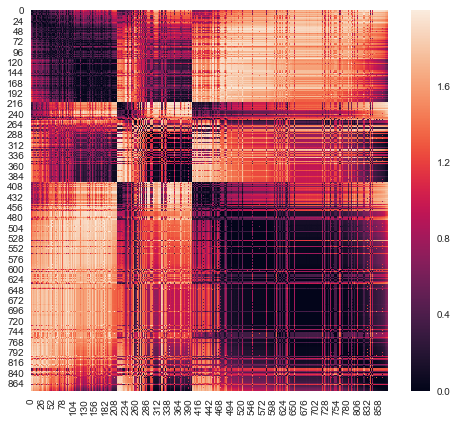

In [29]:
f, ax = plt.subplots(figsize=(8, 7))


std = StandardScaler()

df_imputed_copy = df_imputed.copy().sort_values(by=['Pclass','Age','Survived'])

xdata = pairwise_distances(std.fit_transform(df_imputed_copy[vars_to_use].values), metric='correlation')
sns.heatmap(xdata, cmap=cmap, annot=False)
print('Is there anything we can conclude?')

______
## Revisiting other Plots in Seaborn

/Users/eclarson/anaconda3/envs/mlenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


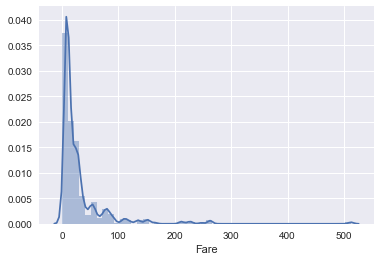

In [30]:
# can we make a better combined histogram and KDE?
sns.distplot(df_imputed.Fare)
plt.show()

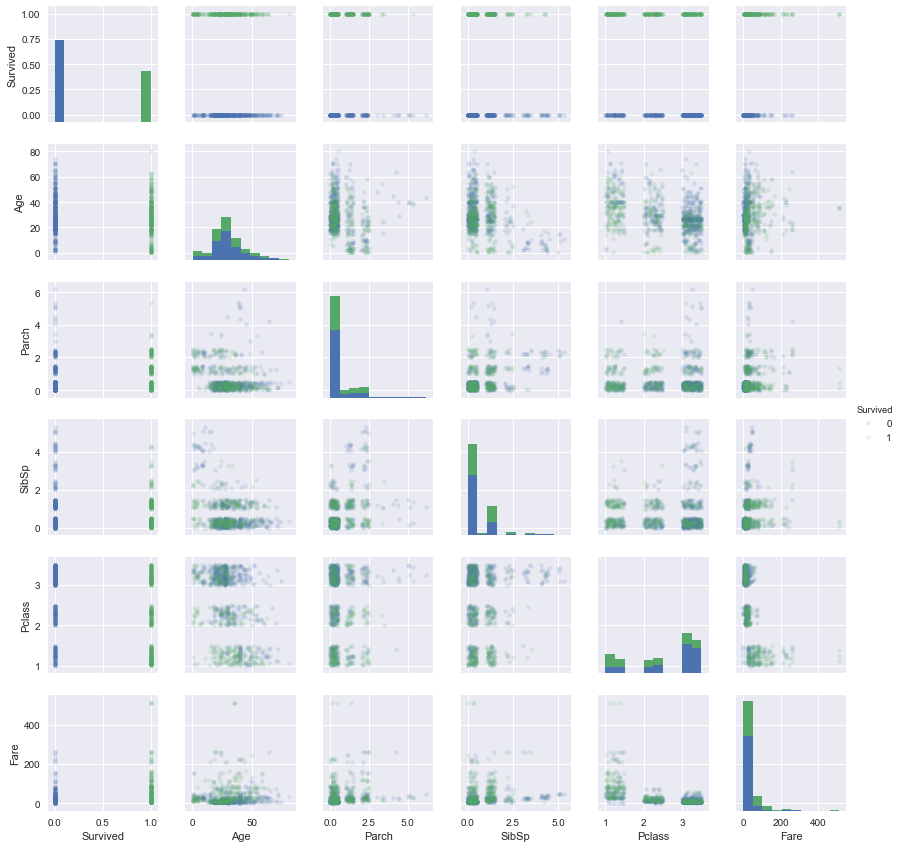

In [31]:
# lets make a pretty plot of the scatter matrix
df_imputed_jitter = df_imputed.copy()
df_imputed_jitter[['Parch','SibSp','Pclass']] += np.random.rand(len(df_imputed_jitter),3)/2 
sns.pairplot(df_imputed_jitter, hue="Survived", size=2,
            plot_kws=dict(s=20, alpha=0.15, linewidth=0))
plt.show()

____
# Revisiting with Interactive Visuals: Plotly
- https://plot.ly/python/getting-started/

More updates to come to this section of the notebook. Plotly is a major step in the direction of using JavaScript and python together and I would argue it has a much better implementation than other packages. 

Plotly: 3.1.1


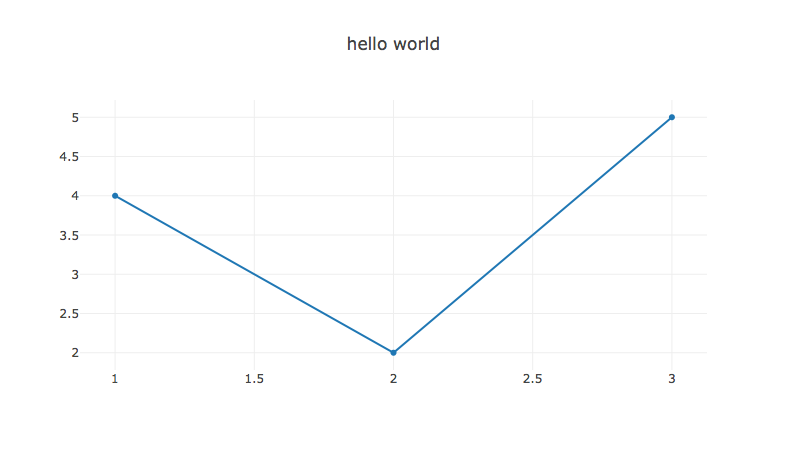

In [32]:
# directly from the getting started example...
import plotly
print('Plotly:', plotly. __version__)

plotly.offline.init_notebook_mode() # run at the start of every notebook
plotly.offline.iplot({
    "data": [{
        "x": [1, 2, 3],
        "y": [4, 2, 5]
    }],
    "layout": {
        "title": "hello world"
    }
})

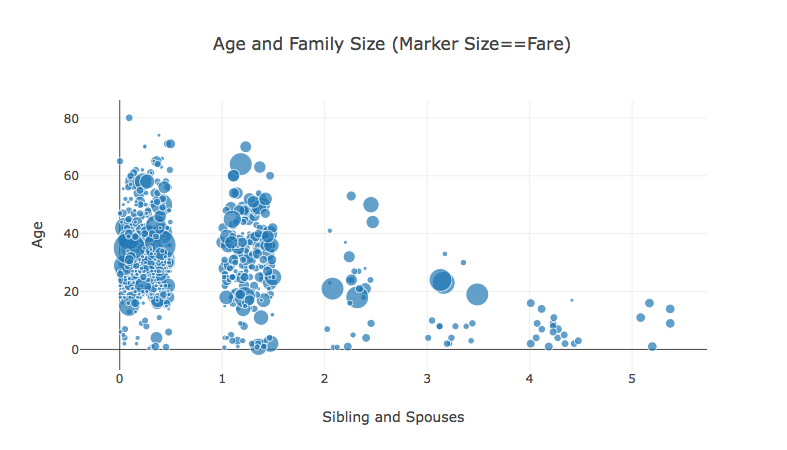

In [34]:
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
# let's manipulate the example to serve our purposes

# plotly allows us to create JS graph elements, like a scatter object
plotly.offline.iplot({
    'data':[
        Scatter(x=df_imputed.SibSp.values+np.random.rand(*df_imputed.SibSp.shape)/2,
                y=df_imputed.Age,
      
                text=df_imputed.Survived.values.astype(str),
                marker=Marker(size=df_imputed.Fare, sizemode='area', sizeref=1,),
                mode='markers')
            ],
    'layout': Layout(xaxis=XAxis(title='Sibling and Spouses'), 
                     yaxis=YAxis(title='Age'),
                     title='Age and Family Size (Marker Size==Fare)')
}, show_link=False)

Visualizing more than three attributes requires a good deal of thought. In the following graph, lets use interactivity to help bolster the analysis. We will create a graph with custom text overlays that help refine the passenger we are looking at. We will 
- color code whether they survived
- Scatter plot Age and Social class
- Code the number of siblings/spouses traveling with them through the size of the marker

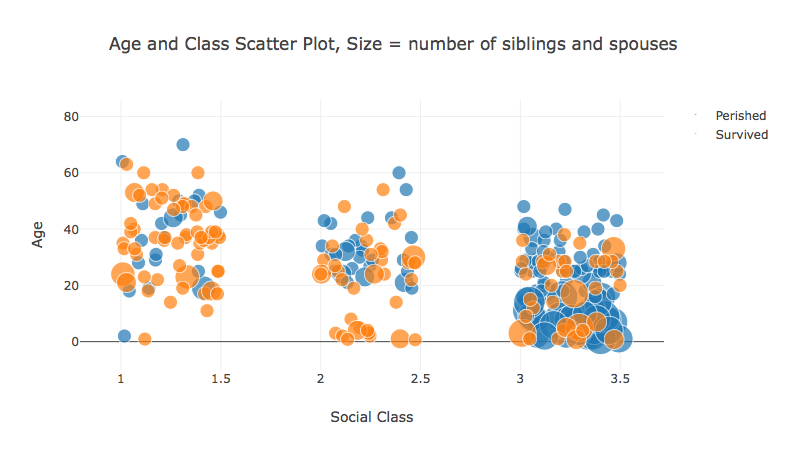

In [35]:
def get_text(df_row):
    return 'Age: %d<br>Class: %d<br>Fare: %.2f<br>SibSpouse: %d<br>ParChildren: %d'%(df_row.Age,df_row.Pclass,df_row.Fare,df_row.SibSp,df_row.Parch)

df_imputed['text'] = df_imputed.apply(get_text,axis=1)
textstring = ['Perished','Survived', ]

plotly.offline.iplot({
    'data': [ # creates a list using a comprehension
        Scatter(x=df_imputed.Pclass[df_imputed.Survived==val].values+np.random.rand(*df_imputed.SibSp[df_imputed.Survived==val].shape)/2,
                y=df_imputed.Age[df_imputed.Survived==val],
                text=df_imputed.text[df_imputed.Survived==val].values.astype(str),
                marker=Marker(size=df_imputed[df_imputed.Survived==val].SibSp, sizemode='area', sizeref=0.01,),
                mode='markers',
                name=textstring[val]) for val in [0,1]
    ],
    'layout': Layout(xaxis=XAxis(title='Social Class'), 
                     yaxis=YAxis(title='Age'),
                     title='Age and Class Scatter Plot, Size = number of siblings and spouses'),
    
}, show_link=False)

Check more about using plotly here:
- https://plot.ly/python/ipython-notebook-tutorial/ 

# Seaborn, Matplotlib, and Plotly
If we can capture the matplotlib figure, then we can usually export it to plotly, like so:

**Note: everything below here is deprecated right now. **

In [111]:
from plotly.offline import iplot_mpl
from plotly.offline import plot_mpl 
import plotly.tools as tls

fig = plt.figure()

sns.set_palette("hls")
sns.distplot(df_imputed.Age)

plotly_fig = tls.mpl_to_plotly(fig)

# plot_mpl(fig, strip_style = False) 

/Users/eclarson/anaconda3/envs/mlenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



ValueError: 
    Invalid value of type 'numpy.float64' received for the 'bargap' property of layout
        Received value: -4.440892098500626e-16

    The 'bargap' property is a number and may be specified as:
      - An int or float in the interval [0, 1]

### But it can't do everything...

In [32]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="SibSp", y="Age", hue="Survived", data=df_imputed, 
               split=True, inner="quart")

iplot_mpl(f) 

ValueError: 
    Invalid value of type 'builtins.str' received for the 'dash' property of scatter.line
        Received value: '4.59375px,4.59375px'

    The 'dash' property is a string and must be specified as:
      - One of the following strings:
            ['solid', 'dot', 'dash', 'longdash', 'dashdot',
            'longdashdot']
      - A number that will be converted to a string